## Video 39


 What is a regression problem?
 - predict something out of the data, the question is not a yes or no question, but a number. So the solution might be, the thing on that image is a cat for about 75%.
  - Questions like: How much, how many, how ... can be answered with regression.

## Video 40


What kind of data is needed for a regression problem?
Ok some kind of data what you think are relevant to predict the answer from the neural network.

The way data has to be converted for a nn is for example the one hot encoding. So this means you create a list as long as all possible interpretations the data can have.
Is the data a cat or a dog or a mouse? One-Hot list maybe [0,1,0] for a dog.

This interpretation is also called a feature encoding and data representation.
1. Categorical Data Encoding
    - One-Hot Encoding: Converts categorical variables into binary vectors.
    - Label Encoding: Assigns each category a unique integer.
    - Ordinal Encoding: Like label encoding, but assumes an order in the categories.
    - Binary Encoding: Converts category indices to binary and stores them in multiple bits.
    - Target Encoding (Mean Encoding): Replaces categories with the mean of the target variable (useful for supervised learning).
2. Numerical Data Scaling & Normalization
    - Min-Max Scaling: Rescales values between 0 and 1.
    - Standardization (Z-score normalization): Centers values around 0 with unit variance.
    - Log Transformation: Used for skewed distributions.
    - Quantile Transformation: Maps data to a normal distribution.
3. Text Data Encoding
    - Bag of Words (BoW): Counts word occurrences.
    - TF-IDF (Term Frequency-Inverse Document Frequency): Adjusts word importance based on frequency across documents.
    - Word Embeddings (Word2Vec, GloVe, FastText): Maps words to dense vector spaces.
    - Character-Level Encoding: Similar to word embeddings, but on a character level.
4. Image Data Encoding
    - Raw Pixel Values: Direct input of pixel intensities.
    - Normalized Pixel Values: Pixels scaled to a range (e.g., 0-1 or -1 to 1).
    - Feature Extraction (HOG, SIFT, CNNs): Extracts meaningful features instead of raw pixels.
5. Graph Data Encoding
    - Adjacency Matrix Encoding: Represents connections between nodes as a matrix.
    - Graph Embeddings (Node2Vec, GCNs): Maps nodes to vector spaces.
6. Time Series & Sequential Data Encoding
    - Sliding Windows: Transforms time series into overlapping windows for learning.
    - Fourier Transform / Wavelet Transform: Extracts frequency-domain features.
    - Lag Features: Uses past values as inputs.



## Video 41

Architectures of Neural Networks
1. Feedforward Neural Networks (FNNs)
    - Basic neural network architecture
    - No feedback loops between neurons
    - Used for regression and classification tasks.
    - Variants
        - Single-layer perceptron: One layer of input nodes and one layer of output nodes, no hidden layers.
        - Multi-layer perceptron: Contains one or more hidden layers between the input and output layers.
2. Convolutional Neural Networks (CNNs)
    - Specialized for image data
    - Contains convolutional layers for feature extraction
        - Convolutional layers: Apply filters to input data to detect patterns.
        - Pooling layers: Reduce spatial dimensions of the data.
        - Fully connected layers: Perform classification based on extracted features.
    - Used for image classification, object detection, and segmentation tasks.
3. Recurrent Neural Networks (RNNs)
4. Transformer Neural Networks
5. Autoencoder Neural Networks
6. Generative Adversarial Networks (GANs)
7. Graph Neural Networks (GNNs)
8. Spike Neural Networks
9. etc.



## Video 42

**Definition of a regression problem:**
Method of the smallest absolute deviation ...

In [5]:
import os
import numpy

In [7]:
# disable the NUMA warning/support
# import os
# from cProfile import label

# from keras.src.backend import shape
# from keras.src.backend.jax.core import unstack

# os.environ['TF_NUMA_ENABLED'] = '0'

In [14]:
import numpy as np
import tensorflow as tf
# import matplotlib.pyplot as plt
import pandas as pd
# from tensorflow import keras as ks
# import keras as ks

# print(tf.__version__)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/light/WORKSPACE/TensorFlow_for_Deep_Learning_Bootcamp/.venv1/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/light/WORKSPACE/TensorFlow_for_Deep_Learning_Bootcamp/.venv1/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/light/WORKSPACE/TensorFlow_for_Deep_Learnin

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

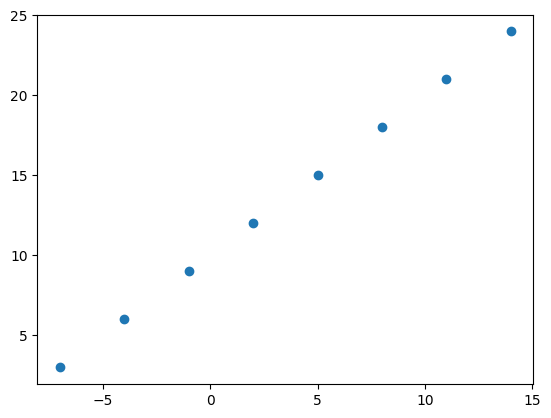

In [15]:
# create some data for first regression example

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [16]:
# check the pattern in the data idea
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [17]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [18]:
# example of housing info, video example
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

in this example the house_info has  the shape of 3 and the house_price has the shape of 1.
So what wr are trying to do is to make conclusions of the house_price out of the house_info.

## Video 44



In [19]:
# turn numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Start modelling with TensorFlow

1. Create a model: define input layer and hidden layers and output layer
2. Compile a model: define the loss function and the optimizer
3. Fit a model: let the model find patterns between X and y
4. Evaluate a model: check how well the model is doing

In [20]:
# set random seed
tf.random.set_seed(42)

# 1. create a model
model = ks.Sequential()
model.add(ks.layers.Input(shape=(1,)))
model.add(ks.layers.Dense(1))

# 2. compile the model
model.compile(loss=ks.losses.MeanAbsoluteError,
              optimizer=ks.optimizers.SGD(),
              metrics=['mae'])

# 3. fit the model
model.fit(X, y, epochs=5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 13.2755 - mae: 13.2755
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.1430 - mae: 13.1430
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.0105 - mae: 13.0105
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.8780 - mae: 12.8780
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.7455 - mae: 12.7455


In [21]:
X.dtype, y.dtype

(tf.float64, tf.float64)

In [22]:
X = tf.cast(X, dtype=tf.float32)
y = tf.cast(y, dtype=tf.float32)
X.dtype, y.dtype

(tf.float32, tf.float32)

In [23]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [24]:
try_1 = tf.constant([17.0])
try_1

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([17.], dtype=float32)>

In [25]:
pred_1 = model.predict(try_1)
pred_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[4.1152315]], dtype=float32)

In [26]:
type(pred_1)

numpy.ndarray

In [27]:
X_test = tf.constant([17, 20, 23, 26, 29, 31, 34, 37], dtype=tf.float32, shape=(8,))
predict = tf.cast(model.predict(X_test), dtype=tf.float32)
predict = tf.reshape(predict, shape=(8,))
X_test, predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([17., 20., 23., 26., 29., 31., 34., 37.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([4.1152315, 4.832625 , 5.550019 , 6.2674127, 6.984806 , 7.4630685,
        8.180463 , 8.897856 ], dtype=float32)>)

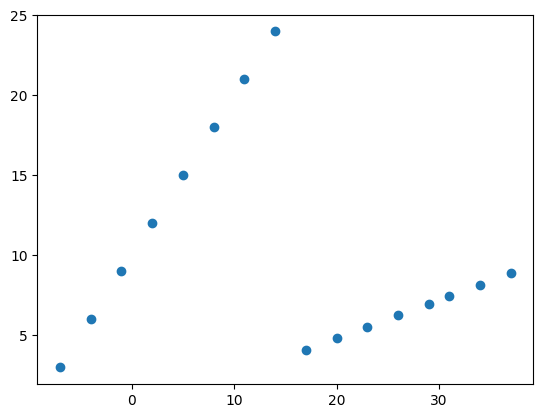

In [28]:
x_all = tf.concat([X, X_test], axis=0)
y_all = tf.concat([y, predict], axis=0)
plt.scatter(x_all, y_all)

In [29]:
def concat_pred_and_print(x_test: list, x, y, model):
    test = tf.cast(x_test, dtype=tf.float32)

    test_predict = model.predict(test)
    test_reshape = tf.reshape(test_predict, shape=(len(x_test),))

    x_all = tf.concat([x, test], axis=0)
    y_all = tf.concat([y, test_reshape], axis=0)
    plt.scatter(x_all, y_all)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


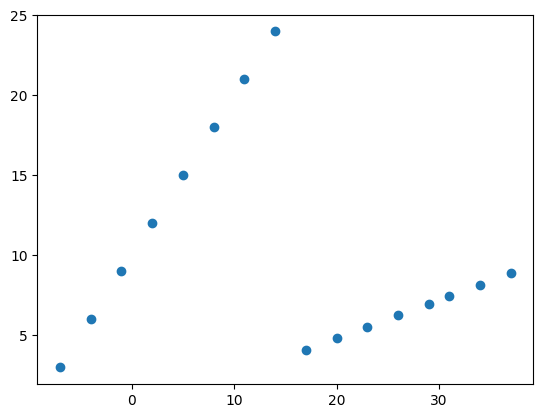

In [30]:
concat_pred_and_print([17, 20, 23, 26, 29, 31, 34, 37], X, y, model)

## Video 45

Optimierung des Modells

Idea, test to shuffle the learn data

In [31]:
stacked = tf.stack([X, y], axis=1)
stacked

<tf.Tensor: shape=(8, 2), dtype=float32, numpy=
array([[-7.,  3.],
       [-4.,  6.],
       [-1.,  9.],
       [ 2., 12.],
       [ 5., 15.],
       [ 8., 18.],
       [11., 21.],
       [14., 24.]], dtype=float32)>

In [32]:
shuffled = tf.random.shuffle(stacked)
shuffled

<tf.Tensor: shape=(8, 2), dtype=float32, numpy=
array([[14., 24.],
       [-1.,  9.],
       [-7.,  3.],
       [ 5., 15.],
       [ 2., 12.],
       [-4.,  6.],
       [ 8., 18.],
       [11., 21.]], dtype=float32)>

In [33]:
X, y = tf.unstack(shuffled, axis=1)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([14., -1., -7.,  5.,  2., -4.,  8., 11.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([24.,  9.,  3., 15., 12.,  6., 18., 21.], dtype=float32)>)

In [34]:
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 12.6130 - mae: 12.6130
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.4805 - mae: 12.4805
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.3480 - mae: 12.3480
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.2155 - mae: 12.2155
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.0830 - mae: 12.0830


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


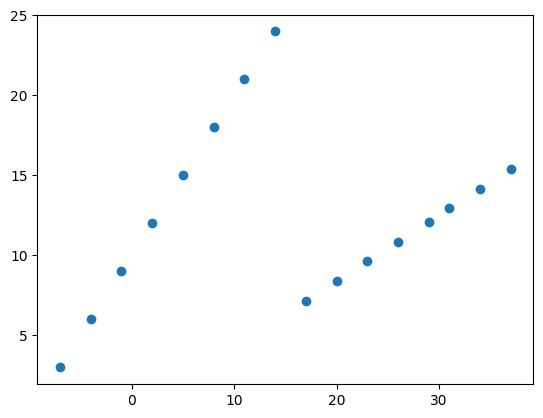

In [35]:
concat_pred_and_print([17, 20, 23, 26, 29, 31, 34, 37], X, y, model)

In [36]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]) # 17, 20
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]) # 27, 30
X_orig = tf.constant(X, dtype=tf.float32)
y_orig = tf.constant(y, dtype=tf.float32)

# 1. create a model
model = ks.Sequential()
model.add(ks.layers.Input(shape=(1,)))
model.add(ks.layers.Dense(100,  activation='relu'))
model.add(ks.layers.Dense(100, activation='relu'))
model.add(ks.layers.Dense(100, activation='relu'))
model.add(ks.layers.Dense(1, activation='relu'))

# 2. compile the model
model.compile(loss=ks.losses.MeanAbsoluteError,
              optimizer=ks.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

# 3. fit the model
model.fit(X_orig, y_orig, epochs=40)

Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - loss: 13.3287 - mae: 13.3287
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.9840 - mae: 12.9840
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.7044 - mae: 12.7044
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.4319 - mae: 12.4319
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.1471 - mae: 12.1471
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.8514 - mae: 11.8514
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.5411 - mae: 11.5411
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.2146 - mae: 11.2146
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.9070 - mae: 10.9070
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.6531 - mae: 10.6531
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.3831 - mae: 10.3831
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.0921 - mae: 10.0921
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━

Optimizers
- Stochastic Gradient Descent (SGD): Updates weights based on the gradient of the loss function.
- Adam: Adaptive Moment Estimation, combines the advantages of RMSprop and momentum.
- RMSprop: Divides the learning rate by the moving average of the root mean square of the gradients.
- Adagrad: Adapts the learning rate to the parameters.
- Adadelta: Extends Adagrad to reduce aggressive, monotonically decreasing learning rates.
- Adamax: Generalization of Adam based on the infinity norm.
- Nadam: Adam with Nesterov momentum.
- FTRL: Follow the regularized leader optimizer.

In [37]:
X_orig = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0], dtype=tf.float64)
y_orig = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0], dtype=tf.float64)

# 1. create a model
model1 = ks.Sequential()
model1.add(ks.layers.Input(shape=(1,)))
model1.add(ks.layers.Dense(20, activation='relu'))
model1.add(ks.layers.Dense(20, activation='relu'))
model1.add(ks.layers.Dense(20, activation='relu'))
model1.add(ks.layers.Dense(20, activation='relu'))
model1.add(ks.layers.Dense(1))

# 2. compile the model
model1.compile(loss=ks.losses.MeanAbsoluteError,
              optimizer=ks.optimizers.Adam(),
              metrics=['mae'])

# 3. fit the model
model1.fit(X_orig, y_orig, epochs=200)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - loss: 13.2334 - mae: 13.2334
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.1859 - mae: 13.1859
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.1364 - mae: 13.1364
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.0836 - mae: 13.0836
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.0327 - mae: 13.0327
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 12.9863 - mae: 12.9863
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 12.9385 - mae: 12.9385
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.8894 - mae: 12.8894
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.8388 - mae: 12.8388
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.7869 - mae: 12.7869
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.7334 - mae: 12.7334
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.6783 - mae: 12.6783
Epoch 13/200
1/1 ━━━━━━━

In [38]:
x_test = tf.constant([17.0, 20.0, 23.0, 26.0, 29.0, 31.0, 34.0, 37.0], dtype=tf.float32, shape=(8,))
y_test = tf.constant([27.0, 30.0, 33.0, 36.0, 39.0, 42.0, 45.0, 48.0], dtype=tf.float32)
x_test, y_test

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([17., 20., 23., 26., 29., 31., 34., 37.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([27., 30., 33., 36., 39., 42., 45., 48.], dtype=float32)>)

In [39]:
y_predict = model1.predict(x_test)
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[30.346762],
       [35.101887],
       [39.857006],
       [44.612133],
       [49.36726 ],
       [52.53734 ],
       [57.292458],
       [62.04759 ]], dtype=float32)

## Video 48

Visualize, Visualize, Visualize

In [40]:
x1_generated = [-7.0 + i*3 for i in range(100)]
y1_generated = [3.0 + i*3 for i in range(100)]
stack = tf.stack([x1_generated, y1_generated], axis=1)
stack

<tf.Tensor: shape=(100, 2), dtype=float32, numpy=
array([[ -7.,   3.],
       [ -4.,   6.],
       [ -1.,   9.],
       [  2.,  12.],
       [  5.,  15.],
       [  8.,  18.],
       [ 11.,  21.],
       [ 14.,  24.],
       [ 17.,  27.],
       [ 20.,  30.],
       [ 23.,  33.],
       [ 26.,  36.],
       [ 29.,  39.],
       [ 32.,  42.],
       [ 35.,  45.],
       [ 38.,  48.],
       [ 41.,  51.],
       [ 44.,  54.],
       [ 47.,  57.],
       [ 50.,  60.],
       [ 53.,  63.],
       [ 56.,  66.],
       [ 59.,  69.],
       [ 62.,  72.],
       [ 65.,  75.],
       [ 68.,  78.],
       [ 71.,  81.],
       [ 74.,  84.],
       [ 77.,  87.],
       [ 80.,  90.],
       [ 83.,  93.],
       [ 86.,  96.],
       [ 89.,  99.],
       [ 92., 102.],
       [ 95., 105.],
       [ 98., 108.],
       [101., 111.],
       [104., 114.],
       [107., 117.],
       [110., 120.],
       [113., 123.],
       [116., 126.],
       [119., 129.],
       [122., 132.],
       [125., 135.],
     

In [41]:
x1, y1 = tf.unstack(stack, axis=1)

model1 = ks.Sequential()
model1.add(ks.layers.Input(shape=(1,)))
model1.add(ks.layers.Dense(20, activation='relu'))
model1.add(ks.layers.Dense(20, activation='relu'))
model1.add(ks.layers.Dense(20, activation='relu'))
model1.add(ks.layers.Dense(20, activation='relu'))
model1.add(ks.layers.Dense(1))

# 2. compile the model
model1.compile(loss=ks.losses.MeanAbsoluteError,
              optimizer=ks.optimizers.Adam(),
              metrics=['mae'])

# 3. fit the model
model1.fit(x1, y1, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 154.0657 - mae: 154.0657  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 147.9411 - mae: 147.9411
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 141.4144 - mae: 141.4144
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 134.3930 - mae: 134.3930
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 126.7396 - mae: 126.7396
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 118.6449 - mae: 118.6449
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 110.5260 - mae: 110.5260
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 101.2111 - mae: 101.2111
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 90.3924 - mae: 90.3924
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 77.7259 - mae: 77.7259
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62.8233 - mae: 62.8233
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45.2751 - mae: 45.2751
Epoch 13/100
4/4 ━━

In [42]:
a = np.arange(0, 9, 0.3)
model1.predict(a)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[ 4.935876 ],
       [ 4.862304 ],
       [ 5.103164 ],
       [ 5.437225 ],
       [ 5.766395 ],
       [ 6.0891747],
       [ 6.408353 ],
       [ 6.727531 ],
       [ 7.0467095],
       [ 7.365888 ],
       [ 7.6850657],
       [ 8.004244 ],
       [ 8.323422 ],
       [ 8.6426   ],
       [ 8.961778 ],
       [ 9.280957 ],
       [ 9.600135 ],
       [ 9.9193125],
       [10.238492 ],
       [10.55767  ],
       [10.876847 ],
       [11.196027 ],
       [11.515204 ],
       [11.834384 ],
       [12.153562 ],
       [12.472739 ],
       [12.791917 ],
       [13.111096 ],
       [13.430275 ],
       [13.748878 ]], dtype=float32)

In [43]:
a = np.arange(0, 30, 3)
a_test = np.arange(30, 60, 3)
b = np.arange(-7, 23, 3)
b_test = np.arange(23, 51, 3)
a, b, a_test, b_test

(array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27]),
 array([-7, -4, -1,  2,  5,  8, 11, 14, 17, 20]),
 array([30, 33, 36, 39, 42, 45, 48, 51, 54, 57]),
 array([23, 26, 29, 32, 35, 38, 41, 44, 47, 50]))

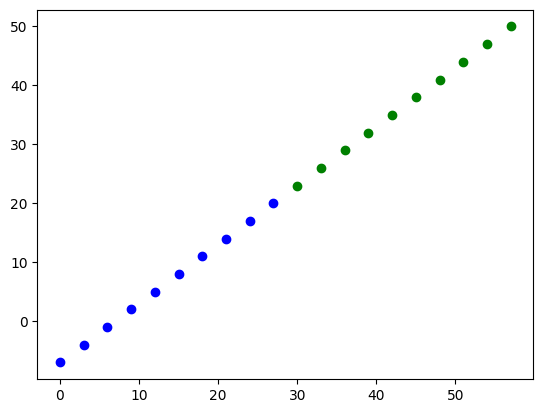

In [44]:
plt.scatter(a, b, c='blue')
plt.scatter(a_test, b_test, c='green')

In [45]:
model2 = ks.Sequential()
model2.add(ks.layers.Input(shape=(1,)))
model2.add(ks.layers.Dense(20, activation='relu'))
model2.add(ks.layers.Dense(20, activation='relu'))
model2.add(ks.layers.Dense(20, activation='relu'))
model2.add(ks.layers.Dense(1))

# 2. compile the model
model2.compile(loss=ks.losses.MeanAbsoluteError,
              optimizer=ks.optimizers.Adam(),
              metrics=['mae'])

# 3. fit the model
model2.fit(a, b, epochs=100)

b_predict = model2.predict(a_test)
b_predict

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - loss: 8.9257 - mae: 8.9257
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.8539 - mae: 8.8539
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.7822 - mae: 8.7822
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.7106 - mae: 8.7106
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.6402 - mae: 8.6402
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.5783 - mae: 8.5783
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.5157 - mae: 8.5157
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.4569 - mae: 8.4569
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.3981 - mae: 8.3981
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.3383 - mae: 8.3383
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.2774 - mae: 8.2774
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.2154 - mae: 8.2154
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/st

array([[19.132557],
       [21.047014],
       [22.961477],
       [24.87594 ],
       [26.790401],
       [28.704863],
       [30.619322],
       [32.533787],
       [34.44825 ],
       [36.362713]], dtype=float32)

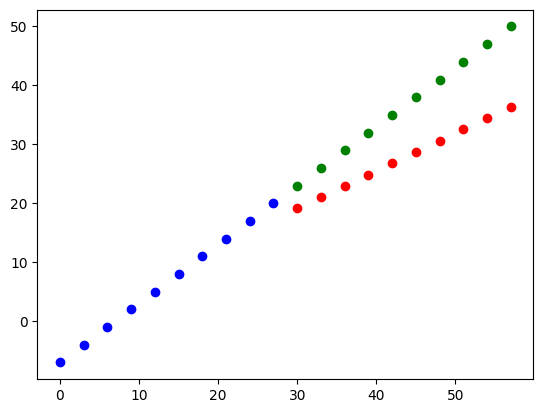

In [46]:
plt.scatter(a, b, c='blue')
plt.scatter(a_test, b_test, c='green')
plt.scatter(a_test, b_predict, c='red')

## creating extra data for learning

In [47]:
a_extend = []
b_extend = []
for i, j in zip(a, b):
    a_extend.append(i-0.02)
    a_extend.append(i-0.01)
    a_extend.append(i-0.2)
    a_extend.append(i-0.1)
    a_extend.append(i)
    a_extend.append(i+0.01)
    a_extend.append(i+0.02)
    a_extend.append(i+0.1)
    a_extend.append(i+0.2)
    b_extend.append(j-0.02)
    b_extend.append(j-0.01)
    b_extend.append(j-0.2)
    b_extend.append(j-0.1)
    b_extend.append(j)
    b_extend.append(j+0.01)
    b_extend.append(j+0.02)
    b_extend.append(j+0.1)
    b_extend.append(j+0.2)
a_extend, b_extend

([np.float64(-0.02),
  np.float64(-0.01),
  np.float64(-0.2),
  np.float64(-0.1),
  np.int64(0),
  np.float64(0.01),
  np.float64(0.02),
  np.float64(0.1),
  np.float64(0.2),
  np.float64(2.98),
  np.float64(2.99),
  np.float64(2.8),
  np.float64(2.9),
  np.int64(3),
  np.float64(3.01),
  np.float64(3.02),
  np.float64(3.1),
  np.float64(3.2),
  np.float64(5.98),
  np.float64(5.99),
  np.float64(5.8),
  np.float64(5.9),
  np.int64(6),
  np.float64(6.01),
  np.float64(6.02),
  np.float64(6.1),
  np.float64(6.2),
  np.float64(8.98),
  np.float64(8.99),
  np.float64(8.8),
  np.float64(8.9),
  np.int64(9),
  np.float64(9.01),
  np.float64(9.02),
  np.float64(9.1),
  np.float64(9.2),
  np.float64(11.98),
  np.float64(11.99),
  np.float64(11.8),
  np.float64(11.9),
  np.int64(12),
  np.float64(12.01),
  np.float64(12.02),
  np.float64(12.1),
  np.float64(12.2),
  np.float64(14.98),
  np.float64(14.99),
  np.float64(14.8),
  np.float64(14.9),
  np.int64(15),
  np.float64(15.01),
  np.float64(

In [48]:
a_extend = tf.constant(a_extend)
b_extend = tf.constant(b_extend)

model3 = ks.Sequential()
model3.add(ks.layers.Input(shape=(1,)))
model3.add(ks.layers.Dense(20, activation='relu'))
model3.add(ks.layers.Dense(20, activation='relu'))
model3.add(ks.layers.Dense(20, activation='relu'))
model3.add(ks.layers.Dense(1))

# 2. compile the model
model3.compile(loss=ks.losses.MeanAbsoluteError,
              optimizer=ks.optimizers.Adam(),
              metrics=['mae'])

# 3. fit the model
model3.fit(a_extend, b_extend, epochs=90)

Epoch 1/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3646 - mae: 4.3646  
Epoch 2/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1005 - mae: 4.1005 
Epoch 3/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8285 - mae: 3.8285
Epoch 4/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5529 - mae: 3.5529
Epoch 5/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3708 - mae: 3.3708
Epoch 6/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2153 - mae: 3.2153
Epoch 7/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1447 - mae: 3.1447
Epoch 8/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1239 - mae: 3.1239
Epoch 9/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1367 - mae: 3.1367
Epoch 10/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1240 - mae: 3.1240
Epoch 11/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0938 - mae: 3.0938
Epoch 12/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0817 - mae: 3.0817
Epoch 13/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0835 - mae:

In [49]:
b_extend_predict = model3.predict(a_test)
b_extend_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[22.452957],
       [25.258842],
       [28.064735],
       [30.870625],
       [33.67651 ],
       [36.482395],
       [39.288292],
       [42.094173],
       [44.900063],
       [47.705658]], dtype=float32)

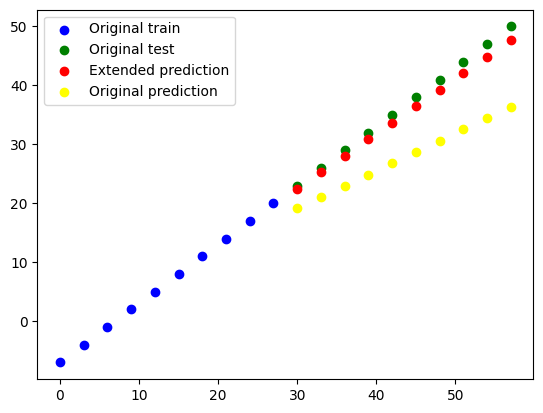

In [50]:
# plt.figure(figsize=(10, 7))
plt.scatter(a, b, c='blue', label='Original train')
plt.scatter(a_test, b_test, c='green', label='Original test')
plt.scatter(a_test, b_extend_predict, c='red', label='Extended prediction')
plt.scatter(a_test, b_predict, c='yellow', label='Original prediction')
plt.legend()

removing a little bit and adding a little bit generates much more data for learning. This is a good way to generate more data for learning. This is called data augmentation. (really, just invented it for myself)

how are tricks like this called in the real world copilot? Data augmentation, data preprocessing, data cleaning, data wrangling, data transformation

### Welche Optimizer gibt es?
- Stochastic Gradient Descent (SGD): Updates weights based on the gradient of the loss function.
- Adam: Adaptive Moment Estimation, combines the advantages of RMSprop and momentum.
- RMSprop: Divides the learning rate by the moving average of the root mean square of the gradients.

### Welche Activation funktionen gibt es?
- ReLU
- Sigmoid
- Tanh

Testing summary and building a nn

In [51]:
model4 = ks.Sequential()
model4.add(ks.layers.Input(shape=(1,)))
model4.add(ks.layers.Dense(20, activation='relu'))
model4.add(ks.layers.Dense(20, activation='relu'))
model4.add(ks.layers.Dense(20, activation='relu'))
model4.add(ks.layers.Dense(1))

# 2. compile the model
model4.compile(loss=ks.losses.MeanAbsoluteError,
              optimizer=ks.optimizers.Adam(),
              metrics=['mae'])

# 3. fit the model
# model3.fit(a_extend, b_extend, epochs=90)

In [52]:
model4.build()

In [53]:
model4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 20)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 901 (3.52 KB)

 Trainable params: 901 (3.52 KB)

 Non-trainable params: 0 (0.00 B)

Total params sind die neuronen welche träiniert werden können
trainable sind diese die ihre werte verändern können
non trainable, analag dazu.. sind häufig bereits gelernte implementierte nn die in das nn integriert worden sind

In [2]:
import plot_model
from keras.src.layers import Wrapper


model5 = ks.Sequential()
model5.add(ks.layers.Input(shape=(1,)))
model5.add(ks.layers.Dense(20, activation='relu'))
model5.add(ks.layers.Dense(20, activation='relu'))
model5.add(ks.layers.Dense(20, activation='relu'))
model5.add(ks.layers.Dense(1))

plot_model.plot_model(model=model5)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/light/WORKSPACE/TensorFlow_for_Deep_Learning_Bootcamp/.venv/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.laun

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/light/WORKSPACE/TensorFlow_for_Deep_Learning_Bootcamp/.venv/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.laun

AttributeError: _UFUNC_API not found

ImportError: numpy.core.umath failed to import